Импорт данных:

In [1]:
# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

# Первичный анализ данных
print(train.head())
print(train.info())

# Проверка типов данных
print(train.dtypes)

# Поиск уникальных значений в текстовых столбцах
for col in train.select_dtypes(include=['object']).columns:
    print(f"Столбец {col}: {train[col].unique()}")

# Преобразование категориальных данных
from sklearn.preprocessing import LabelEncoder

# Преобразование строковых данных в числовые значения
for col in train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])

# Преобразование строковых данных в числовые значения для тестового набора
for col in test.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    test[col] = le.fit_transform(test[col])


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

Анализ пропусков и выбросов:

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64


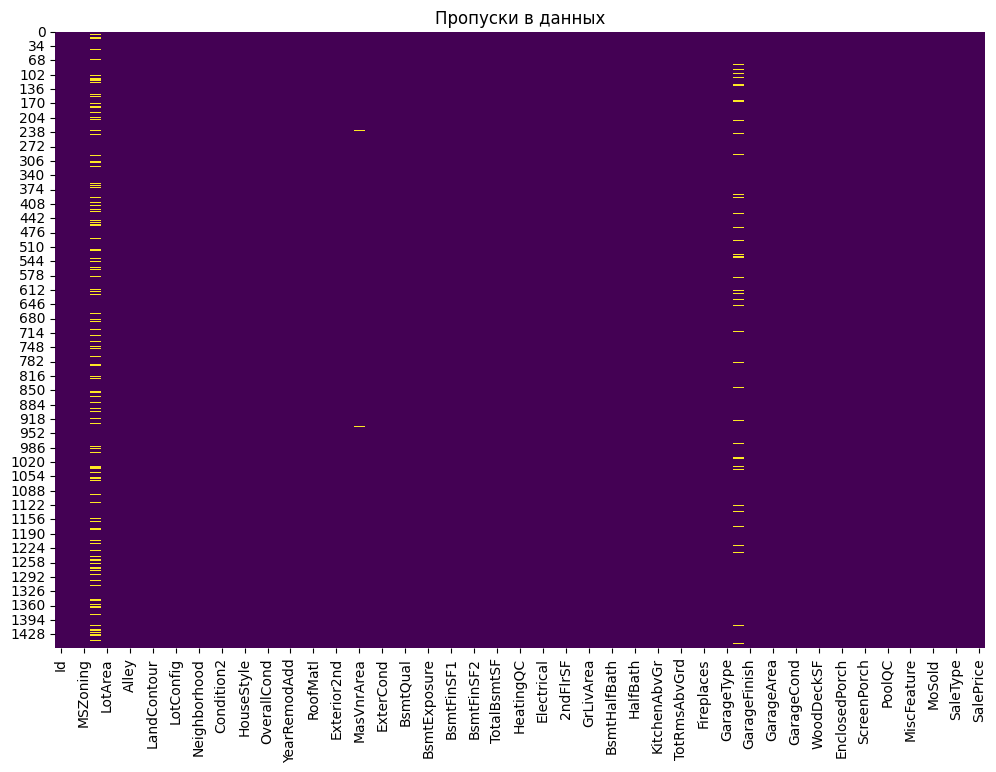

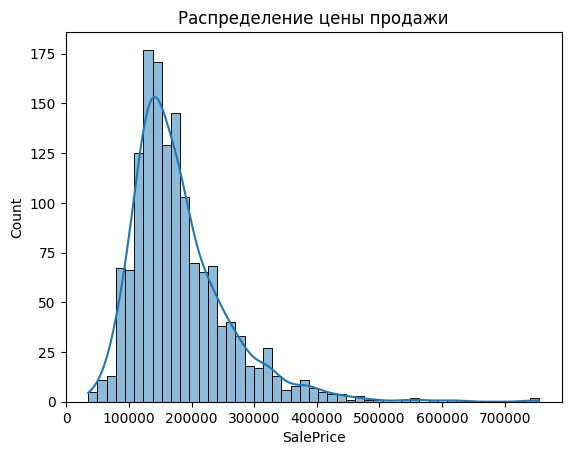

In [2]:
# Проверка пропусков
missing_values = train.isnull().sum()
print(missing_values[missing_values > 0])

# График пропусков
plt.figure(figsize=(12, 8))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title("Пропуски в данных")
plt.show()

# Статистика целевой переменной
sns.histplot(train['SalePrice'], kde=True)
plt.title("Распределение цены продажи")
plt.show()


Корреляционный анализ:

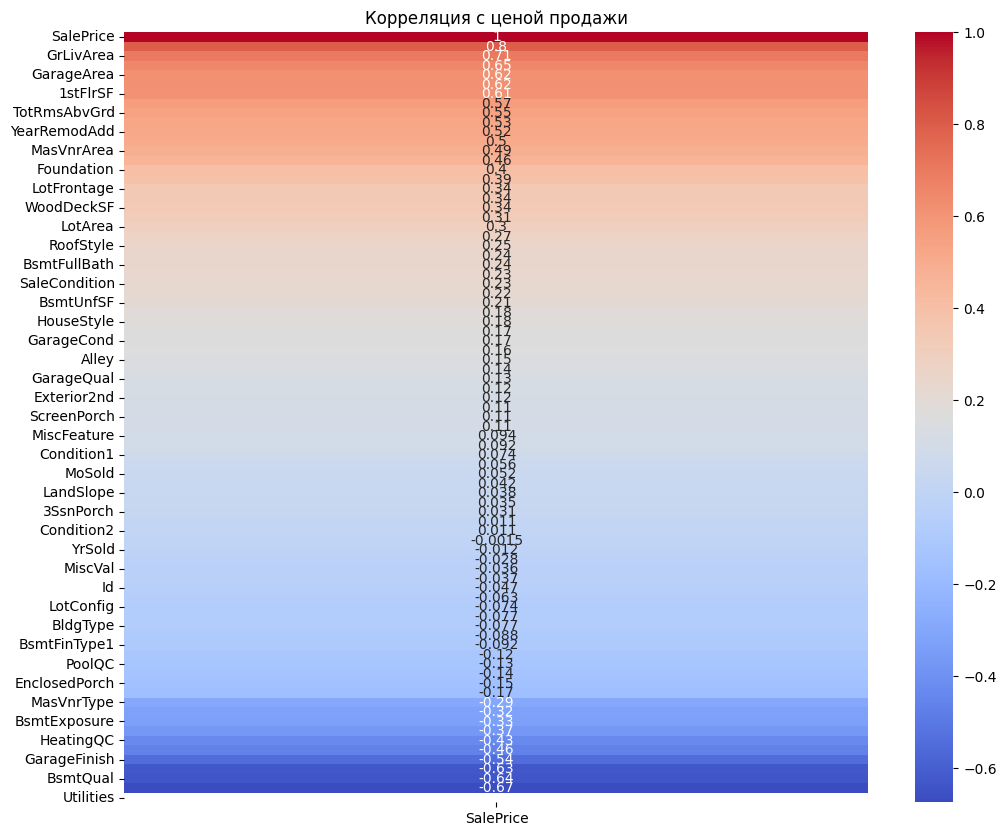

In [3]:

# Корреляционный анализ
if train.isnull().any().any():
    train = train.dropna()

corr = train.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True, cmap='coolwarm')
plt.title("Корреляция с ценой продажи")
plt.show()


Графики, которые показывают сравнение реальных и предсказанных значений:

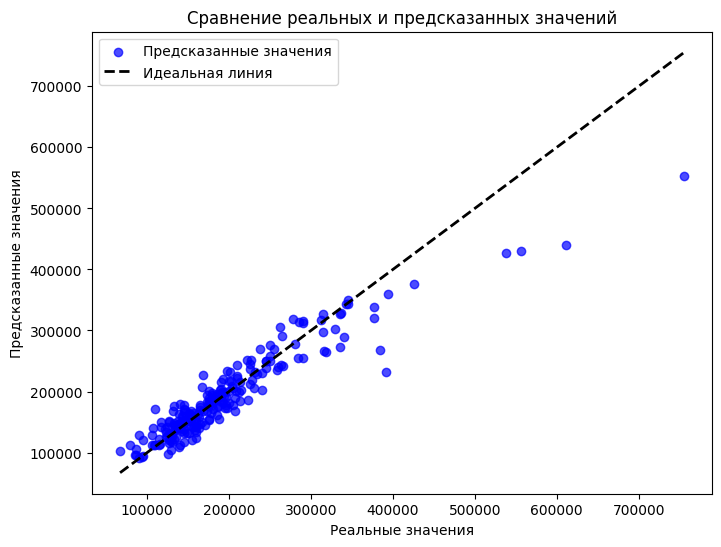

In [4]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Разделение данных
X = train.drop('SalePrice', axis=1)  # Обучающие признаки
y = train['SalePrice']  # Целевая переменная
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Предсказания
y_pred = model.predict(X_val)

# Построение графика сравнения реальных и предсказанных значений
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred, alpha=0.7, color="blue", label="Предсказанные значения")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2, label="Идеальная линия")
plt.xlabel("Реальные значения")
plt.ylabel("Предсказанные значения")
plt.title("Сравнение реальных и предсказанных значений")
plt.legend()
plt.show()
